# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [4]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

# Resolver sistema de ecuaciones
A=np.array([[1,3],[1,2]])
b=np.array([1,0])

# Se despeja para \beta_0 y \beta_1
beta=np.linalg.inv(A)@b   # Multiplicación matricial -> @
beta

array([-2.,  1.])

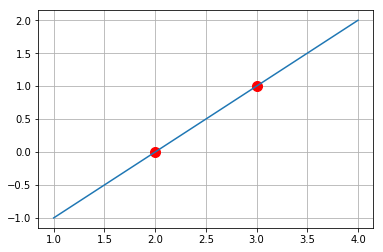

In [8]:
# Gráfica
plt.plot([3,2],[1,0],'or',ms=10)

x=np.linspace(1,4,100)
plt.plot(x,beta[0]+beta[1]*x)
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [9]:
b=np.array([1,0,1])
A=np.array([[1,0,0],[1,1,1],[1,2,4]])

beta=np.linalg.inv(A)@b
beta

array([ 1., -2.,  1.])

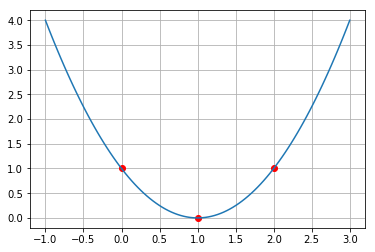

In [11]:
# Gráfica
plt.plot([0,1,2],[1,0,1],'ro')
x=np.linspace(-1,3,100)
plt.plot(x,beta[0]+beta[1]*x+beta[2]*x**2)
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [13]:
# Crear un conjunto de puntos ruidosos a partir de una recta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-20,60,100)
y=5+0.2*x+5*np.random.rand(100)

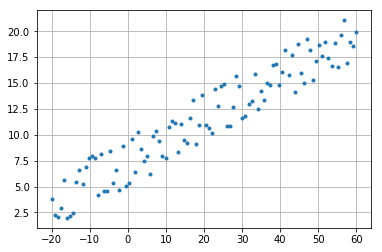

In [17]:
# Graficar
plt.plot(x,y,'o',ms=3)
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [26]:
# Importar scipy.optimize
import scipy.optimize as opt
#opt.minimize?

# definimos la función a minimizar (Con respecto a los parámetros beta)
def f(x,beta):
    return beta[0]+beta[1]*x

# Vemos si es válida la función
#plt.plot(x,f(x,[5,0.2]))

def obj(beta,x,y):
    return np.sum((y-f(x,beta))**2)

In [27]:
beta0=[1,1]
sol=opt.minimize(obj,beta0,args=(x,y))

In [28]:
sol #sol.fun -> es la suma de los errores al cuadrado
    #sol.x   -> son los valores que minimizan la función objetivo (obj)

      fun: 247.01049590920897
 hess_inv: array([[ 4.65661287e-10, -1.45519152e-11],
       [-1.45519152e-11,  4.68479310e-06]])
      jac: array([-7.62939453e-06, -4.95910645e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 137
      nit: 7
     njev: 34
   status: 2
  success: False
        x: array([7.39330136, 0.20382818])

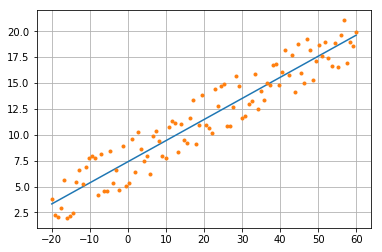

In [29]:
plt.plot(x,f(x,sol.x))
plt.plot(x,y,'o',ms=3)
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

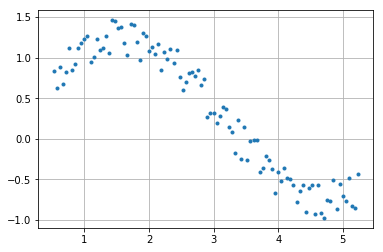

In [33]:
# Generamos 100 puntos ruidosos a partir de una senoidal
x=np.linspace(np.pi/6,5*np.pi/3,100)
y=np.sin(x)+0.5*np.random.rand(100)

plt.plot(x,y,'o',ms=3)
plt.grid()

In [37]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [36]:
# definimos la función objetivo
def obj(beta,x,y,f):
    return np.sum((y-f(x,beta))**2)

In [35]:
# ajuste lineal
def f1(x,beta):
    return beta[0]+beta[1]*x

# ajuste cuadrático
def f2(x,beta):
    return beta[0]+beta[1]*x+beta[2]*x**2

# ajuste cúbico
def f3(x,beta):
    return beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3

In [38]:
beta0_1=[1,1]
sol1=opt.minimize(obj,beta0_1,args=(x,y,f1))

beta0_2=[1,1,1]
sol2=opt.minimize(obj,beta0_2,args=(x,y,f2))

beta0_3=[1,1,1,1]
sol3=opt.minimize(obj,beta0_3,args=(x,y,f3))

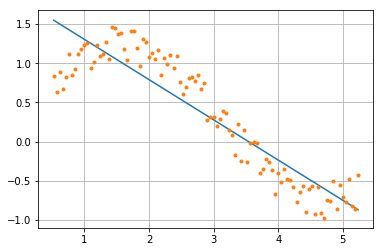

In [40]:
# Gráficas
plt.plot(x,f1(x,sol1.x))
plt.plot(x,y,'o',ms=3)
plt.grid()

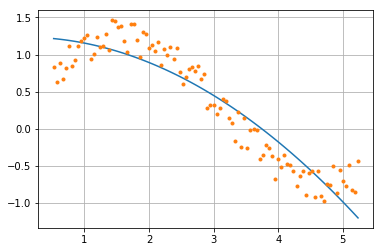

In [41]:
plt.plot(x,f2(x,sol2.x))
plt.plot(x,y,'o',ms=3)
plt.grid()

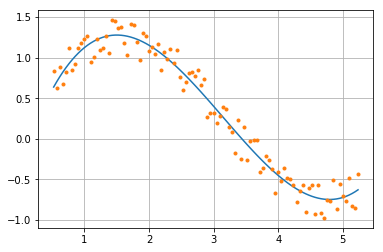

In [42]:
plt.plot(x,f3(x,sol3.x))
plt.plot(x,y,'o',ms=3)
plt.grid()

In [43]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |

In [46]:
np.ones((5,))

array([1., 1., 1., 1., 1.])

In [56]:
def f(x,beta,n):
    return beta@[x**i for i in range(n+1)]

def obj(beta,x,y,n):
    return np.sum((y-f(x,beta,n))**2)

sol4=opt.minimize(obj,np.ones((5,)),args=(x,y,4))
sol5=opt.minimize(obj,np.ones((6,)),args=(x,y,5))

In [57]:
sol4.x

array([-0.21086259,  2.11379803, -0.84906464,  0.05651058,  0.00494126])

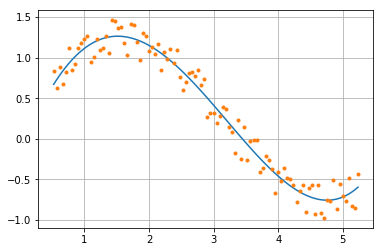

In [58]:
plt.plot(x,f(x,sol4.x,4))
plt.plot(x,y,'o',ms=3)
plt.grid()

In [60]:
sol5.x

array([ 0.07232893,  1.33518566, -0.12157626, -0.24295356,  0.06081729,
       -0.00386023])

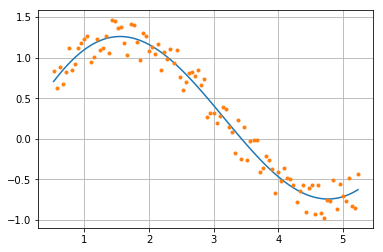

In [59]:
plt.plot(x,f(x,sol5.x,5))
plt.plot(x,y,'o',ms=3)
plt.grid()

In [61]:
# Errores de las regresiones
sol4.fun # Error... Después lo vemos :)

2.04346076335439

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.